## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
master_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#counting the number of mice.
Count_Mice = len(master_data["Mouse ID"].value_counts())
Count_Mice

249

In [3]:
#identifying the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dupe_Mice1 = master_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'
Dupe_Mice2 = master_data.loc[Dupe_Mice1].unique()
print(Dupe_Mice2)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dupe_Mice_Data = pd.DataFrame(Dupe_Mice2)
Dupe_Mice_Data

,0
0,g989


In [5]:
#cleaning DataFrame by dropping the duplicate mouse by its ID.
CleanUp_Mice = master_data['Mouse ID'].isin(Dupe_Mice2)==False
CleanUp_Mice_df = master_data[CleanUp_Mice]
print(CleanUp_Mice_df.head(10))

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  

In [6]:
#checking the number of mice in the clean DataFrame.
Mice_Clean = len(CleanUp_Mice_df["Mouse ID"].value_counts())
Mice_Clean


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean tumor volume
Regimen_Mean = master_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#median tumor volume
Regimen_Median = master_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#variance of tumor volume
Regimen_Variance = master_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#standard Deviation of tumor volume
Regimen_StDev = master_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#SEM of tumor volume
Regimen_SEM = master_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#create DataFrame
Summary_df = pd.DataFrame({"Mean": Regimen_Mean, "Median": Regimen_Median, "Variance": Regimen_Variance, "Standard Deviation": Regimen_StDev, 
                          "SEM": Regimen_SEM})

#assemble the resulting series into a single summary dataframe.
Summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Repeat????

# Using the aggregation method, produce the same summary statistics in a single line
Summary_df2 = master_data.groupby('Drug Regimen').agg(
        Regimen_Mean=('Tumor Volume (mm3)', np.mean),                                                   Regimen_Median=('Tumor Volume (mm3)', np.median),
        Regimen_Variance=('Tumor Volume (mm3)', np.var),                                        
        Regimen_StDev=('Tumor Volume (mm3)', np.std),
        Regimen_SEM=('Tumor Volume (mm3)', st.sem)
)
print(Summary_df2.head())

              Regimen_Mean  Regimen_Median  Regimen_Variance  Regimen_StDev  \
Drug Regimen                                                                  
Capomulin        40.675741       41.557809         24.947764       4.994774   
Ceftamin         52.591172       51.776157         39.290177       6.268188   
Infubinol        52.884795       51.820584         43.128684       6.567243   
Ketapril         55.235638       53.698743         68.553577       8.279709   
Naftisol         54.331565       52.509285         66.173479       8.134708   

              Regimen_SEM  
Drug Regimen               
Capomulin        0.329346  
Ceftamin         0.469821  
Infubinol        0.492236  
Ketapril         0.603860  
Naftisol         0.596466  


## Bar and Pie Charts

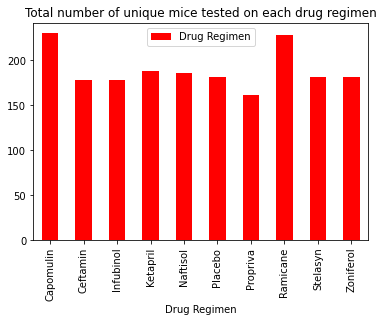

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Unique_Mice = master_data.groupby('Drug Regimen')

#print(Unique_Mice.head())
Unique_Mice_Count = pd.DataFrame(Unique_Mice['Drug Regimen'].count())

#print(Unique_Mice_Count.head())
Unique_Mice_Count_Bar = Unique_Mice_Count.plot(kind='bar', title="Total number of unique mice tested on each drug regimen", color="Red")




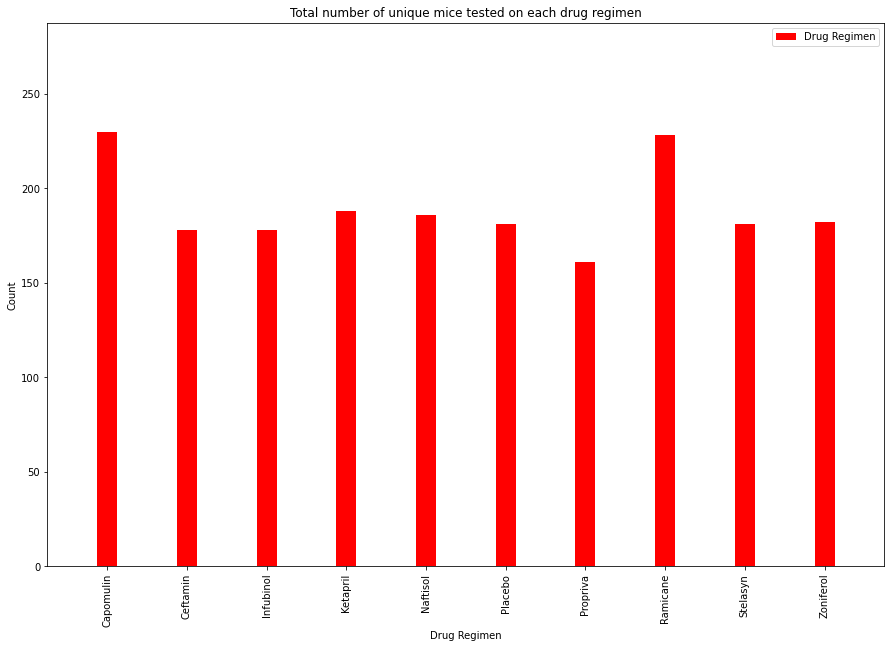

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#create x-axis
x_axis = np.arange(len(Unique_Mice_Count))

#establish ticks along x axis
ticks = [value for value in x_axis]

#create plot resolution
plt.figure(figsize=(15,10))
plt.bar(x_axis, Unique_Mice_Count["Drug Regimen"], color='red', align="center", width = 0.25)

#x labels
plt.xticks(ticks, list(Unique_Mice_Count.index), rotation="vertical")

#axis limits and labels
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug Regimen")
plt.ylim(0, max(Unique_Mice_Count["Drug Regimen"])*1.25)
plt.ylabel("Count")

#title
plt.title("Total number of unique mice tested on each drug regimen")

#legend
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")



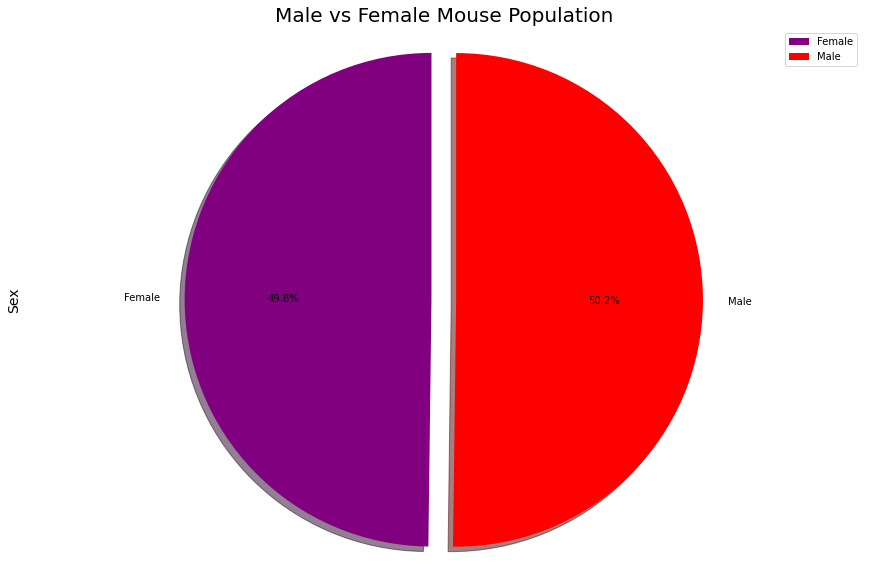

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

#organize by gender
Gender_Mouse = master_data.groupby(["Mouse ID","Sex"])
Gender_df = pd.DataFrame(Gender_Mouse.size())

#create dataframe with total count
Mouse_Gender = pd.DataFrame(Gender_df.groupby(["Sex"]).count())
Mouse_Gender.columns = ["Total Count"]

#create the percentage of female vs male
Mouse_Gender["Percentage of Sex"] = (100*(Mouse_Gender["Total Count"]/Mouse_Gender["Total Count"].sum())).round(2)

#format the "Percentage of Sex" column
Mouse_Gender["Percentage of Sex"] = Mouse_Gender["Percentage of Sex"]

#generate a pie plot showing the distribution of female versus male mice us
colors = ['purple', 'red']
explode = (0.1, 0)
plot = Mouse_Gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=90, explode = explode, shadow = True, autopct='%1.1f%%')

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)
plt.show()






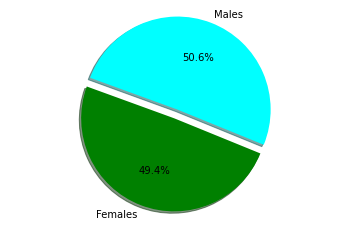

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Mouse2 = (master_data.groupby(["Sex"])["Age_months"].count())
labels = ["Females", "Males"]
colors = ["green", "cyan"]
explode = (0.1, 0)  

#creating the pie chart
plt.pie(Gender_Mouse2, explode=explode, labels=labels, colors=colors,                    autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal") 
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Capomulin
Capomulin_df = master_data.loc[master_data["Drug Regimen"] == "Capomulin",:]

#Ramicane
Ramincane_df = master_data.loc[master_data["Drug Regimen"] == "Ramicane",:]

#Infubinol 
Infubinol_df = master_data.loc[master_data["Drug Regimen"] == "Infubinol", :]

#Ceftamin
Ceftamin_df = master_data.loc[master_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse for each drug regimin

#For Capomulin
Capomulin_Greatest = Capomulin_df.groupby('Mouse ID').max()['Timepoint']

#create data frame with panda
Capomulin_Greatest2 = pd.DataFrame(Capomulin_Greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_Greatest_Merged = pd.merge(Capomulin_Greatest2, master_data, on=("Mouse ID", "Timepoint"), how="left")
#Capomulin_Greatest_Merged.head()

#For Ramicane
Ramicane_Greatest = Ramincane_df.groupby('Mouse ID').max()['Timepoint']

#create data frame with panda
Ramicane_Greatest2 = pd.DataFrame(Ramicane_Greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last  timepoint
Ramicane_Greatest_Merged = pd.merge(Ramicane_Greatest2, master_data, on=("Mouse ID", "Timepoint"), how="left")

#For Infubinol
Infubinol_Greatest = Infubinol_df.groupby('Mouse ID').max()['Timepoint']

#create data frame with panda
Infubinol_Greatest2 = pd.DataFrame(Infubinol_Greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last  timepoint
Infubinol_Greatest_Merged = pd.merge(Infubinol_Greatest2, master_data, on=("Mouse ID", "Timepoint"), how="left")
#Infubinol_Greatest_Merged.head()

#For Ceftamin
Ceftamin_Greatest = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

#create data frame with panda
Ceftamin_Greatest2 = pd.DataFrame(Ceftamin_Greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last  timepoint
Ceftamin_Greatest_Merged = pd.merge(Ceftamin_Greatest2, master_data, on=("Mouse ID", "Timepoint"), how="left")
#Ceftamin_Greatest_Merged.head()


In [17]:
#Analyze list of tumor volumes by regimen

#Capomulin
Capomulin_Tumors = Capomulin_Greatest_Merged["Tumor Volume (mm3)"]

#set quartiles and limits
Capomulin_Quartiles = Capomulin_Tumors.quantile([.25,.5,.75])
Capomulin_Quartile_Lo = Capomulin_Quartiles[.25]
Capomulin_Quartile_Hi = Capomulin_Quartiles[.75]
Capomulin_IQR = Capomulin_Quartile_Hi - Capomulin_Quartile_Lo
Capomulin_LoBound = Capomulin_Quartile_Lo - (1.5 * Capomulin_IQR)
Capomulin_HiBound = Capomulin_Quartile_Hi - (1.5 * Capomulin_IQR)

#Ramicane
Ramicane_Tumors = Ramicane_Greatest_Merged["Tumor Volume (mm3)"]

#set quartiles and limits
Ramicane_Quartiles = Ramicane_Tumors.quantile([.25,.5,.75])
Ramicane_Quartile_Lo = Ramicane_Quartiles[.25]
Ramicane_Quartile_Hi = Ramicane_Quartiles[.75]
Ramicane_IQR = Ramicane_Quartile_Hi - Ramicane_Quartile_Lo
Ramicane_LoBound = Ramicane_Quartile_Lo - (1.5 * Ramicane_IQR)
Ramicane_HiBound = Ramicane_Quartile_Hi - (1.5 * Ramicane_IQR)

#Infubinol
Infubinol_Tumors = Infubinol_Greatest_Merged["Tumor Volume (mm3)"]

#set quartiles and limits
Infubinol_Quartiles = Infubinol_Tumors.quantile([.25,.5,.75])
Infubinol_Quartile_Lo = Infubinol_Quartiles[.25]
Infubinol_Quartile_Hi = Infubinol_Quartiles[.75]
Infubinol_IQR = Infubinol_Quartile_Hi - Infubinol_Quartile_Lo
Infubinol_LoBound = Infubinol_Quartile_Lo - (1.5 * Infubinol_IQR)
Infubinol_HiBound = Infubinol_Quartile_Hi - (1.5 * Infubinol_IQR)

#Ceftamin
Ceftamin_Tumors = Ceftamin_Greatest_Merged["Tumor Volume (mm3)"]

#set quartiles and limits
Ceftamin_Quartiles = Ceftamin_Tumors.quantile([.25,.5,.75])
Ceftamin_Quartile_Lo = Ceftamin_Quartiles[.25]
Ceftamin_Quartile_Hi = Ceftamin_Quartiles[.75]
Ceftamin_IQR = Ceftamin_Quartile_Hi - Ceftamin_Quartile_Lo
Ceftamin_LoBound = Ceftamin_Quartile_Lo - (1.5 * Ceftamin_IQR)
Ceftamin_HiBound = Ceftamin_Quartile_Hi - (1.5 * Ceftamin_IQR)

#Print potential outliers
print(f"Capomulin potential outliers could be values below {Capomulin_LoBound} and above {Capomulin_HiBound} could be outliers.")
print(f"Ramicane potential outliers could be values below {Ramicane_LoBound} and above {Ramicane_HiBound} could be outliers.")
print(f"Infubinol potential outliers could be values below {Infubinol_LoBound} and above {Infubinol_HiBound} could be outliers.")
print(f"Ceftamin potential outliers could be values below {Ceftamin_LoBound} and above {Ceftamin_HiBound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 28.486425109999995 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 27.01120119 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 48.310040109999996 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 40.93320176 could be outliers.


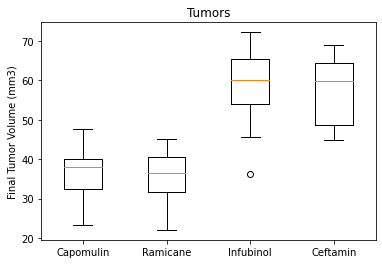

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Box_Plot = [Capomulin_Tumors, Ramicane_Tumors, Infubinol_Tumors, Ceftamin_Tumors]
Figure1, Axis1 = plt.subplots()
Axis1.set_title('Tumors')
Axis1.set_ylabel('Final Tumor Volume (mm3)')
Axis1.boxplot(Box_Plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()


## Line and Scatter Plots

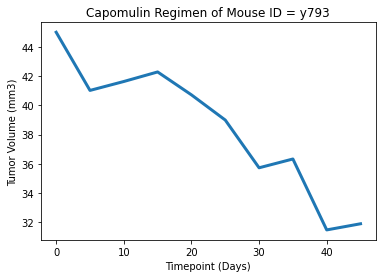

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Selected mouse id = y793
Line_Plot_MouseID = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "y793",:]

#set x axis 
x_axis_TimePoint = Line_Plot_MouseID["Timepoint"]
y_axis_TumorVolume = Line_Plot_MouseID["Tumor Volume (mm3)"]

#create title and labels for axis
plt.title('Capomulin Regimen of Mouse ID = y793')
plt.plot(x_axis_TimePoint, y_axis_TumorVolume,linewidth=3, markersize=9)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

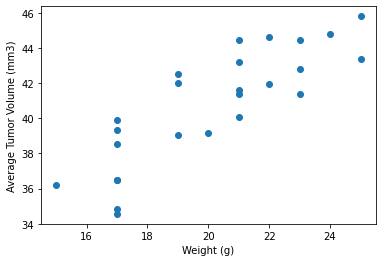

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group capomulin regiment mouse IDs and take mean of values
Capomulin_Average = Capomulin_df.groupby(['Mouse ID']).mean()

#create scatter plot
plt.scatter(Capomulin_Average['Weight (g)'],Capomulin_Average["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
Correlation_Coeff = st.pearsonr(Capomulin_Average['Weight (g)'], Capomulin_Average['Tumor Volume (mm3)'])[0]
Linear_Regress = st.linregress(Capomulin_Average['Weight (g)'], Capomulin_Average['Tumor Volume (mm3)'])

# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and average tumor volume is {Correlation_Coeff}")
print(f"The slope of the liner regression model between mouse weight and average tumor volume is {Linear_Regress[0]} and the y intercept is {Linear_Regress[1]}")

The correlation between mouse weight and average tumor volume is 0.8419363424694717
The slop of the liner regression model between mouse weight and average tumor volume is 0.9544396890241045 and the y intercept is 21.552160532685015
